In [36]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from plot import plotCorrelation, plotSignals
from misc import *

# Import own packages
import sys
sys.path.append("/mnt/d/Projects/Navigation/MyCode/sydr")
from sydr.utils.constants import GPS_L1CA_CODE_FREQ 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Create a GNSS signal

In [37]:
# Parameters
prn = 1
samplingFrequency = 5e6
cn0_target = 45
signal_bw = GPS_L1CA_CODE_FREQ # Bandwidth of the signal for CN0 to SNR computation
#quantization_bits = 8

# Generate signals
signal = generateGPSL1CA(prn=prn, samplingFrequency=samplingFrequency)
sigma_noise = getSigmaFromCN0(signal_power_dB=0, cn0_target_dB=cn0_target, signal_bw=signal_bw)
signal_noisy = addWhiteNoise(signal, sigma=sigma_noise)

# Quantization 
signal_quantized = quantize(signal_noisy, 1)


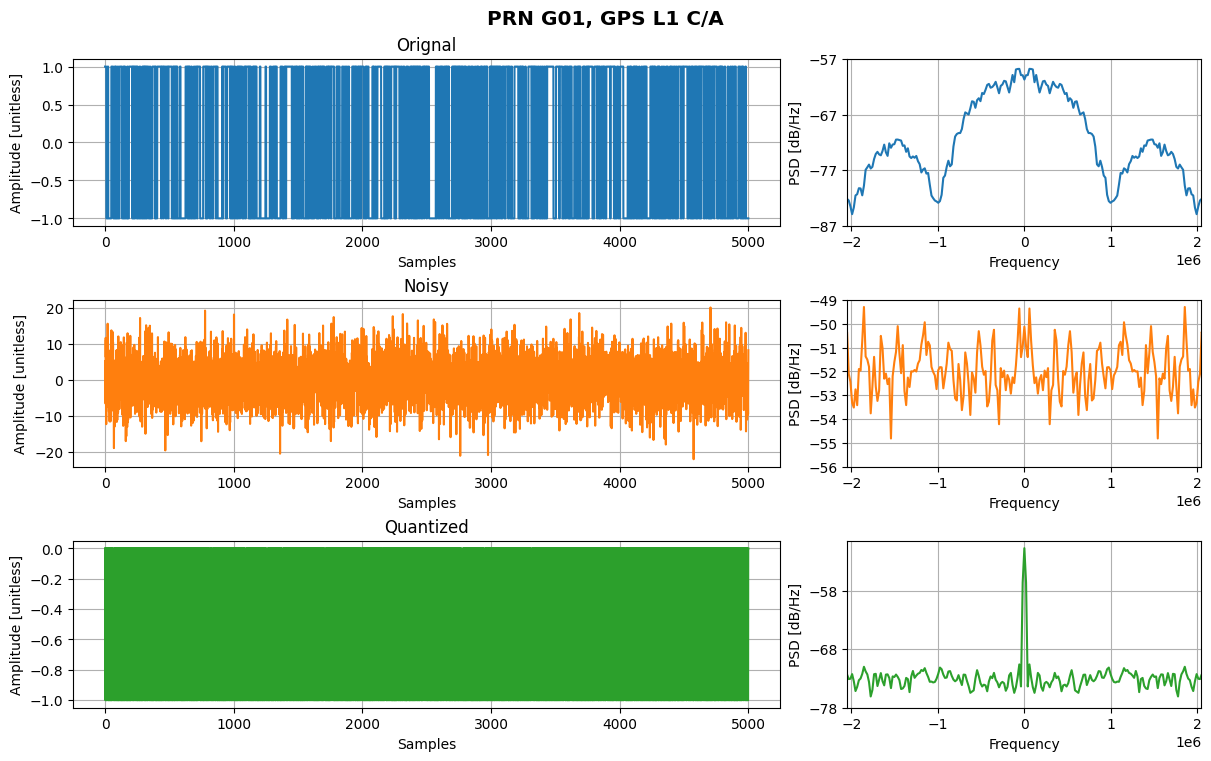

In [38]:
plotSignals({'Orignal' : signal, 'Noisy': signal_noisy, 'Quantized': signal_quantized}, 
            samplingFrequency, GPS_L1CA_CODE_FREQ, f"PRN G{prn:02d}, GPS L1 C/A")

### Perform correlation

In [39]:
# Correlate
signal_corr, signal_lags = correlate(signal, signal)
signal_noisy_corr, signal_noisy_lags = correlate(signal, signal_noisy)



In [45]:
signal_quantized_corr, signal_quantized_lags = correlate(signal, signal_quantized)

In [46]:
signal_axc_corr, signal_axc_lags = correlate(signal, signal_quantized, method='axc')

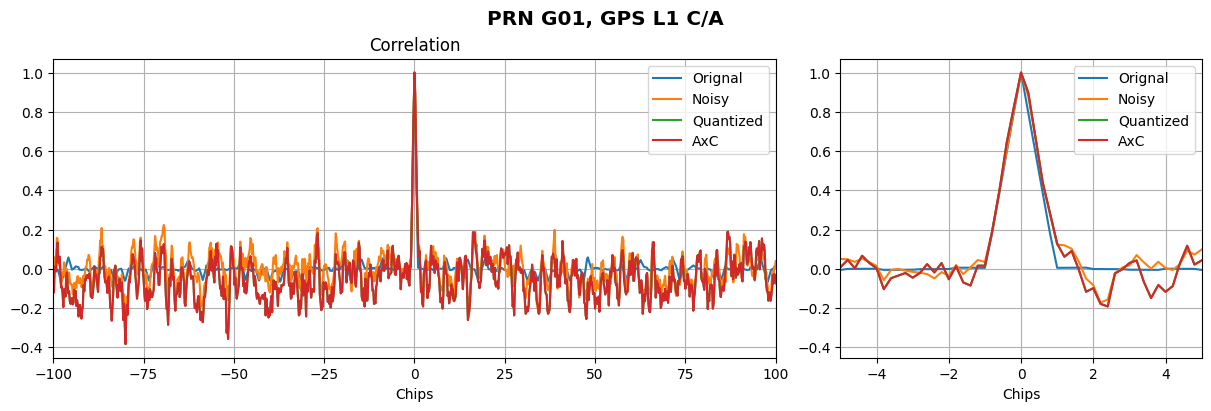

In [47]:
plotCorrelation({
'Orignal' : (signal_corr, signal_lags), 
'Noisy': (signal_noisy_corr, signal_noisy_lags), 
'Quantized': (signal_quantized_corr, signal_quantized_lags),
'AxC': (signal_axc_corr, signal_axc_lags)}, 
samplingFrequency, GPS_L1CA_CODE_FREQ, f"PRN G{prn:02d}, GPS L1 C/A")

In [41]:
len(np.unique(signal_quantized))

2

In [42]:
import numpy as np

class CustomTypeArray(np.ndarray):
    def __new__(cls, input_array):
        obj = np.asarray(input_array).view(cls)
        return obj

    # Define custom __add__ method with custom addition logic and printing
    def __add__(self, other):
        # Check data type compatibility (optional)
        if not isinstance(other, (CustomTypeArray, np.ndarray, np.number)):
            raise TypeError("Unsupported operand type(s) for +: 'CustomTypeArray' and '{}'".format(type(other)))

        # Custom addition logic and printing
        if isinstance(other, (CustomTypeArray, np.ndarray)):
            if self.shape != other.shape:
                raise ValueError("Shapes of operands must match")
            result = np.empty_like(self)  # Create empty array for result
            for i in range(len(self)):
                print(f"Adding elements at index {i}: {self[i]} + {other[i]}")
                result[i] = self[i] + other[i]  # Perform custom addition
            return CustomTypeArray(result)
        else:
            # Handle addition with a number (optional custom logic here)
            raise NotImplementedError("Addition with non-array operand not implemented")

# Example usage:
arr1 = CustomTypeArray([1, 2, 3])
arr2 = CustomTypeArray([4, 5, 6])

try:
  arr3 = arr1 + arr2  # Custom addition with printing
except NotImplementedError as e:
  print(e)

Adding elements at index 0: 1 + 4
Adding elements at index 1: 2 + 5
Adding elements at index 2: 3 + 6
